In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [272]:
class WaveModel:

    def __init__(self, _modelfile=''):
        '''
        WaveModel.init(_modelfile='') - Initalizes the WaveModel class and loads in a modelfile.
        '''
        self.modelfile = np.loadtxt('/home/tka/source/wenqi/tiAlphaProcessed_wavespeeds.csv',
                        delimiter=',')
        self.planes = self.modelfile[:, 1:3]
        self.modelfile = self.modelfile[:,3:184] * 1000.0

    def compute_gaussian(self, _x, _mean, _width):
        return (1 / np.sqrt(2*np.pi*(_width**2)))*np.exp((-(_x-_mean)**2)/(2*(_width**2)))

test_wm = WaveModel()

In [81]:
import pickle
model = pickle.load(open('/home/tka/source/modelplane.p', 'rb'))
expdata = pickle.load(open('/home/tka/source/expplane.p', 'rb'))

In [153]:
modlist = model.tolist()
modlist = [str('{0:.0f}'.format(x)) for x in modlist]
modelplane = ','.join(modlist)
experimentalplane = expdata.tolist()
experimentalplane = [str('{0:.0f}'.format(x)) for x in experimentalplane]
experimentalplane = ','.join(experimentalplane)
print(experimentalplane)

2746,2760,2775,2789,2803,2817,2832,2846,2860,2875,2889,2903,2918,2932,2946,2960,2975,2989,3003,3018,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3062,3063,3064,3065,3066,3067,3068,3069,3070,3069,3068,3067,3066,3065,3064,3063,3062,3062,3061,3060,3059,3058,3057,3056,3055,3054,3053,3052,3051,3050,3049,3048,3047,3046,3045,3044,3043,3042,3041,3041,3040,3039,3038,3037,3036,3035,3034,3033,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3035,3019,3002,2986,2970,2954,2938,2921,2905,2889,2873,2857,2840,2824,2808,2792,2775,2759,2743,2727,2728,2729,2730,2731,2732,2733,2734,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746


In [290]:
import os
import time
testplane = r' "3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445,3450,3450,3450,3555,3445"'
excmd = '/home/tka/eclipse-workspace/planeoc/Debug/planeoc "' + modelplane + '" "' + experimentalplane + '"'
#rint(excmd)
t1 = time.time()
result = []
# PLANE OverClock....get it? get it?
stream = os.popen(excmd)
result = stream.read()
#print(result)
t2 = time.time()
print("Total Python Execution: {0:.2f}ms".format((t2-t1)*1000))
print("{0}\n{1}\t{2}".format(result.split(',')[-1], result.split(',')[-2], result.split(',')[-3]))


Total Python Execution: 20.85ms
C++ Execution time is 5ms.

0	0


In [291]:
resultf = []
for x in range(0, 180):
    resultf.append(float(result.split(',')[x]))

In [181]:

angle = []
fitness = []
for idx, item in enumerate(result[:-52].split(',')):
    if(idx % 2 == 0):
        angle.append(item)
    else:
        fitness.append(item)
fitness[-1] = fitness[-1].split(',')[0].split('\n')[0]
fitness = [float(i) for i in fitness]
angle = [float(i) for i in angle]
    

(0, 2)

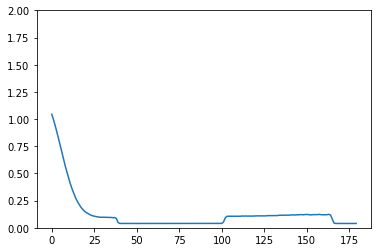

In [182]:
plt.plot(fitness)
plt.ylim(0, 2)

In [292]:
for x in range(0, 182):
    resultdf[x] = pd.to_numeric(resultdf[x],errors='coerce')

In [293]:
resultf

[0.675621,
 0.665809,
 0.656105,
 0.64651,
 0.637028,
 0.627635,
 0.618162,
 0.608617,
 0.599014,
 0.589361,
 0.579673,
 0.569924,
 0.560131,
 0.550372,
 0.540631,
 0.531004,
 0.521373,
 0.511734,
 0.502113,
 0.492507,
 0.482911,
 0.473308,
 0.463687,
 0.454021,
 0.444304,
 0.434508,
 0.424715,
 0.414948,
 0.405227,
 0.395577,
 0.385982,
 0.376405,
 0.36682,
 0.356617,
 0.345508,
 0.333232,
 0.319528,
 0.304651,
 0.288859,
 0.27276,
 0.257099,
 0.242455,
 0.229162,
 0.217244,
 0.20651,
 0.196728,
 0.187757,
 0.179459,
 0.171841,
 0.165059,
 0.159449,
 0.155298,
 0.152851,
 0.150503,
 0.148123,
 0.145735,
 0.143207,
 0.140307,
 0.136647,
 0.131906,
 0.125807,
 0.119908,
 0.114189,
 0.108733,
 0.103451,
 0.0983438,
 0.0933953,
 0.0886057,
 0.0839612,
 0.0794642,
 0.0751031,
 0.0707745,
 0.0665604,
 0.0626373,
 0.0590001,
 0.0556379,
 0.0524574,
 0.0495411,
 0.0468844,
 0.0444843,
 0.0423385,
 0.0402822,
 0.0382029,
 0.0361904,
 0.0342493,
 0.0323815,
 0.0314477,
 0.0312161,
 0.0313996,
 

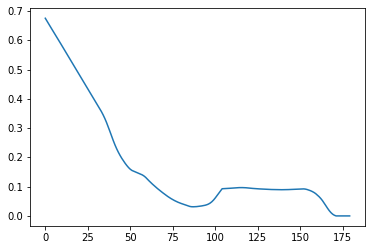

In [294]:
plt.plot(resultf)

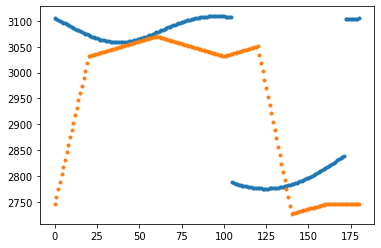

In [260]:
plt.plot(np.roll(model, 0), '.')
plt.plot(expdata, '.')

In [295]:
test_wm.compute_gaussian(expdata[0], model[0], 50)

5.3046370690149146e-14